In [22]:
#forming a maze using 1 and 0
from queue import Queue

def bfs(maze, start, end):
    queue = Queue()
    queue.put([start])  

    while not queue.empty():
        path = queue.get()  
        x, y = path[-1]     

        if (x, y) == end:
            return path  

        for dx, dy in [(1,0), (0,1), (-1,0), (0,-1)]:  
            next_x, next_y = x + dx, y + dy
            if maze[next_x][next_y] != '#' and (next_x, next_y) not in path:
                new_path = list(path)
                new_path.append((next_x, next_y))
                queue.put(new_path)  


def print_maze(maze):
    for row in maze:
        print("".join([' ' if cell == 0 else '█' for cell in row]))


maze = [
    [1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 1, 0, 1],
    [1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1]
]


print_maze(maze)


█ ████ █
█ █    █
█   ██ █
█ █  █ █
██ █ █ █
█      █
████████


Enter the dimension of the maze:  6


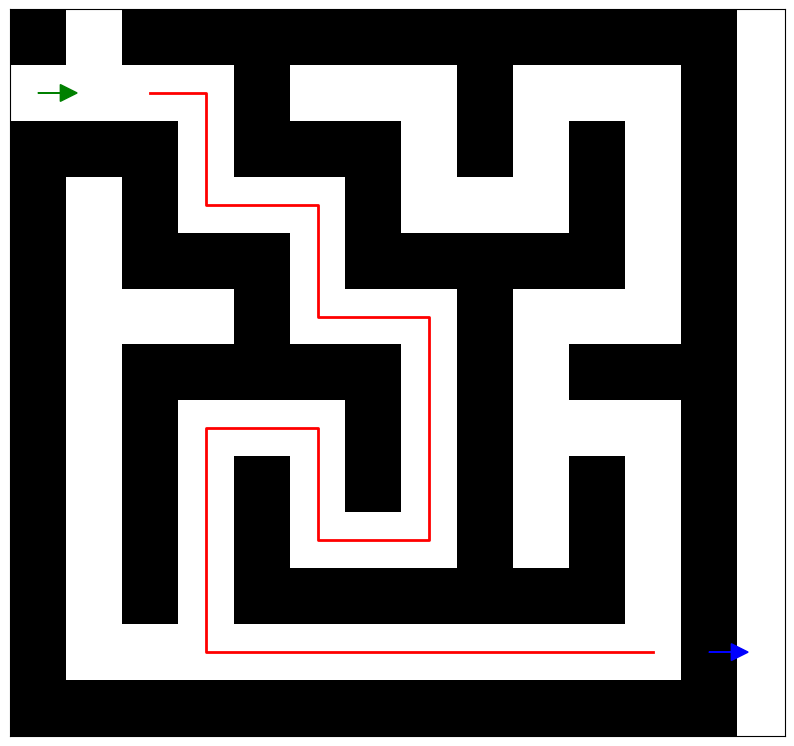

In [35]:
# maze solver
import matplotlib.pyplot as plt
import numpy as np
import random
from queue import Queue

def create_maze(dim):
    # Create a grid filled with walls
    maze = np.ones((dim*2+1, dim*2+1))

    # Define the starting point
    x, y = (0, 0)
    maze[2*x+1, 2*y+1] = 0

    # Initialize the stack with the starting point
    stack = [(x, y)]
    while len(stack) > 0:
        x, y = stack[-1]

        # Define possible directions
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        random.shuffle(directions)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if nx >= 0 and ny >= 0 and nx < dim and ny < dim and maze[2*nx+1, 2*ny+1] == 1:
                maze[2*nx+1, 2*ny+1] = 0
                maze[2*x+1+dx, 2*y+1+dy] = 0
                stack.append((nx, ny))
                break
        else:
            stack.pop()
            
    # Create an entrance and an exit
    maze[1, 0] = 0
    maze[0, 1] = 0

    return maze

def find_path(maze):
    # BFS algorithm to find the shortest path
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    start = (1, 1)
    end = (maze.shape[0]-2, maze.shape[1]-2)
    visited = np.zeros_like(maze, dtype=bool)
    visited[start] = True
    queue = Queue()
    queue.put((start, []))
    while not queue.empty():
        (node, path) = queue.get()
        for dx, dy in directions:
            next_node = (node[0]+dx, node[1]+dy)
            if (next_node == end):
                return path + [next_node]
            if (next_node[0] >= 0 and next_node[1] >= 0 and 
                next_node[0] < maze.shape[0] and next_node[1] < maze.shape[1] and 
                maze[next_node] == 0 and not visited[next_node]):
                visited[next_node] = True
                queue.put((next_node, path + [next_node]))

def draw_maze(maze, path=None):
    fig, ax = plt.subplots(figsize=(10,10))
    
    # Set the border color to white
    fig.patch.set_edgecolor('white')
    fig.patch.set_linewidth(0)

    ax.imshow(maze, cmap=plt.cm.binary, interpolation='nearest')
    
    # Draw the solution path if it exists
    if path is not None:
        x_coords = [x[1] for x in path]
        y_coords = [y[0] for y in path]
        ax.plot(x_coords, y_coords, color='red', linewidth=2)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Draw entry and exit arrows
    ax.arrow(0, 1, .4, 0, fc='green', ec='green', head_width=0.3, head_length=0.3)
    ax.arrow(maze.shape[1] - 1, maze.shape[0]  - 2, 0.4, 0, fc='blue', ec='blue', head_width=0.3, head_length=0.3)
    
    plt.show()

if __name__ == "__main__":
     dim = int(input("Enter the dimension of the maze: "))
     maze = create_maze(dim)
     path = find_path(maze)
     draw_maze(maze, path)

